# eTransafe heatmap

(C) 2020 dept of Medical Informatics
Erik M. van Mulligen

In [1]:
from __future__ import print_function
import sys  
sys.path.insert(0, '/Users/mulligen/Workspaces/AllProjects/eTS/src')

import kh
import ipywidgets as widgets
import numpy as np
import seaborn as sns
import pandas
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
api = kh.KnowledgeHubAPI()

## Authentication

In [3]:
username = widgets.Text(
    value='e.vanmulligen@erasmusmc.nl',
    placeholder='Knowledge Hub account',
    description='username:',
    disabled=False
)

password = widgets.Password(
    value='',
    placeholder='Knowledge Hub password',
    description='password:',
    disabled=False
)

display(username)
display(password)

Text(value='e.vanmulligen@erasmusmc.nl', description='username:', placeholder='Knowledge Hub account')

Password(description='password:', placeholder='Knowledge Hub password')

In [4]:
if api.login(username.value, password.value) == False:
    print("Failed to login")
else:
    print("successfully logged in")

Failed to login


## Data retrieval

In [19]:
compounds = [
    "Minoxidil","Estradiol","Anastrozole","Felodipine","Amphetamine",",Adenosine","Azathioprine","Levamisole", 
    #"Zolmitriptan","Lidocaine","Alprazolam","Ropivacaine","Foscarnet","Rimonabant","Remoxipride","Cyclophosphamide",
    #"Aripiprazole","Bambuterol","Sulfamethoxazole","Rosiglitazone","Clozapine","Budesonide","Omeprazole","Raltitrexed",
    #"Clonidine","Gefitinib","Ximelagatran","Diazepam","Olanzapine","Zafirlukast","Nifedipine","Indomethacin","Erlotinib",
    #"Formoterol","Diclofenac","Metoprolol","Enprofylline","Bicalutamide","Chlordiazepoxide","Simvastatin","Ranitidine",
    #"Ticagrelor","Sulfinpyrazone","Phenylbutazone","Benazepril","Isosorbide Mononitrate","Deferoxamine","Guanfacine",
    #"Naftifine","Chlorthalidone","Guanethidine","Valproic Acid","Clozapine","Baclofen","Maprotiline","Thioridazine",
    #"Aminoglutethimide","Bromocriptine","Phentolamine","Amantadine","Thiethylperazine","Pindolol","Lidocaine",
    #"Linezolid","Prednisolone","Candoxatril","Diazepam","Orlistat","Carprofen","Cilazapril"
]
studies = api.Medline().getStudiesByCompoundNames(compounds) + \
          api.Faers().getStudiesByCompoundNames(compounds) + \
          api.ClinicalTrials().getStudiesByCompoundNames(compounds) + \
          api.eToxSys().getStudiesByCompoundNames(compounds)

retrieving 535 records
retrieving 0 of 535 Medline records
retrieving 3662 records
retrieving 0 of 3662 FAERS records
retrieving 1000 of 3662 FAERS records
retrieving 2000 of 3662 FAERS records
retrieving 3000 of 3662 FAERS records
retrieving 595 records
retrieving 0 of 595 ClinicalTrials records
retrieving 11183 records
retrieving 0 of 11183 eTOXsys records
retrieving 1000 of 11183 eTOXsys records
retrieving 2000 of 11183 eTOXsys records
retrieving 3000 of 11183 eTOXsys records
retrieving 4000 of 11183 eTOXsys records
retrieving 5000 of 11183 eTOXsys records
retrieving 6000 of 11183 eTOXsys records
retrieving 7000 of 11183 eTOXsys records
retrieving 8000 of 11183 eTOXsys records
retrieving 9000 of 11183 eTOXsys records
retrieving 10000 of 11183 eTOXsys records
retrieving 11000 of 11183 eTOXsys records


## Convert data from databases into X data sets

In [20]:
system = {}
for study in studies:
    source = study['source']
    if not source in system.keys():
        print('source=' + str(source))
        system[source] = {'data':[], 'rows':[], 'cols':[]}
    
    obj = system[source]
    specimenOrgan = study['FINDING']['specimenOrgan']
    if not specimenOrgan in obj['rows']:
        obj['rows'].append(specimenOrgan)
        obj['data'].append(np.zeros(len(obj['cols']), dtype=int).tolist())

    compound = study['COMPOUND']['name']
    if not compound in obj['cols']:
        for row in obj['data']:
            row.append(0)
        obj['cols'].append(compound)
        print('obj.cols=' +str(obj['cols']))

    rows = obj['rows'].index(specimenOrgan)
    cols = obj['cols'].index(compound)
    obj['data'][rows-1][cols-1] += 1

source=Medline
obj.cols=['Azathioprine']
obj.cols=['Azathioprine', 'Estradiol']
obj.cols=['Azathioprine', 'Estradiol', 'Felodipine']
obj.cols=['Azathioprine', 'Estradiol', 'Felodipine', 'Levamisole']
obj.cols=['Azathioprine', 'Estradiol', 'Felodipine', 'Levamisole', 'Minoxidil']
obj.cols=['Azathioprine', 'Estradiol', 'Felodipine', 'Levamisole', 'Minoxidil', 'Amphetamine']
source=FAERS
obj.cols=['Azathioprine']
obj.cols=['Azathioprine', 'Estradiol']
obj.cols=['Azathioprine', 'Estradiol', 'Felodipine']
obj.cols=['Azathioprine', 'Estradiol', 'Felodipine', 'Levamisole']
obj.cols=['Azathioprine', 'Estradiol', 'Felodipine', 'Levamisole', 'Minoxidil']
obj.cols=['Azathioprine', 'Estradiol', 'Felodipine', 'Levamisole', 'Minoxidil', 'Amphetamine']
obj.cols=['Azathioprine', 'Estradiol', 'Felodipine', 'Levamisole', 'Minoxidil', 'Amphetamine', 'anastrozole']
source=ClinicalTrials
obj.cols=['Minoxidil']
obj.cols=['Minoxidil', 'anastrozole']
obj.cols=['Minoxidil', 'anastrozole', 'Estradiol']
source=e

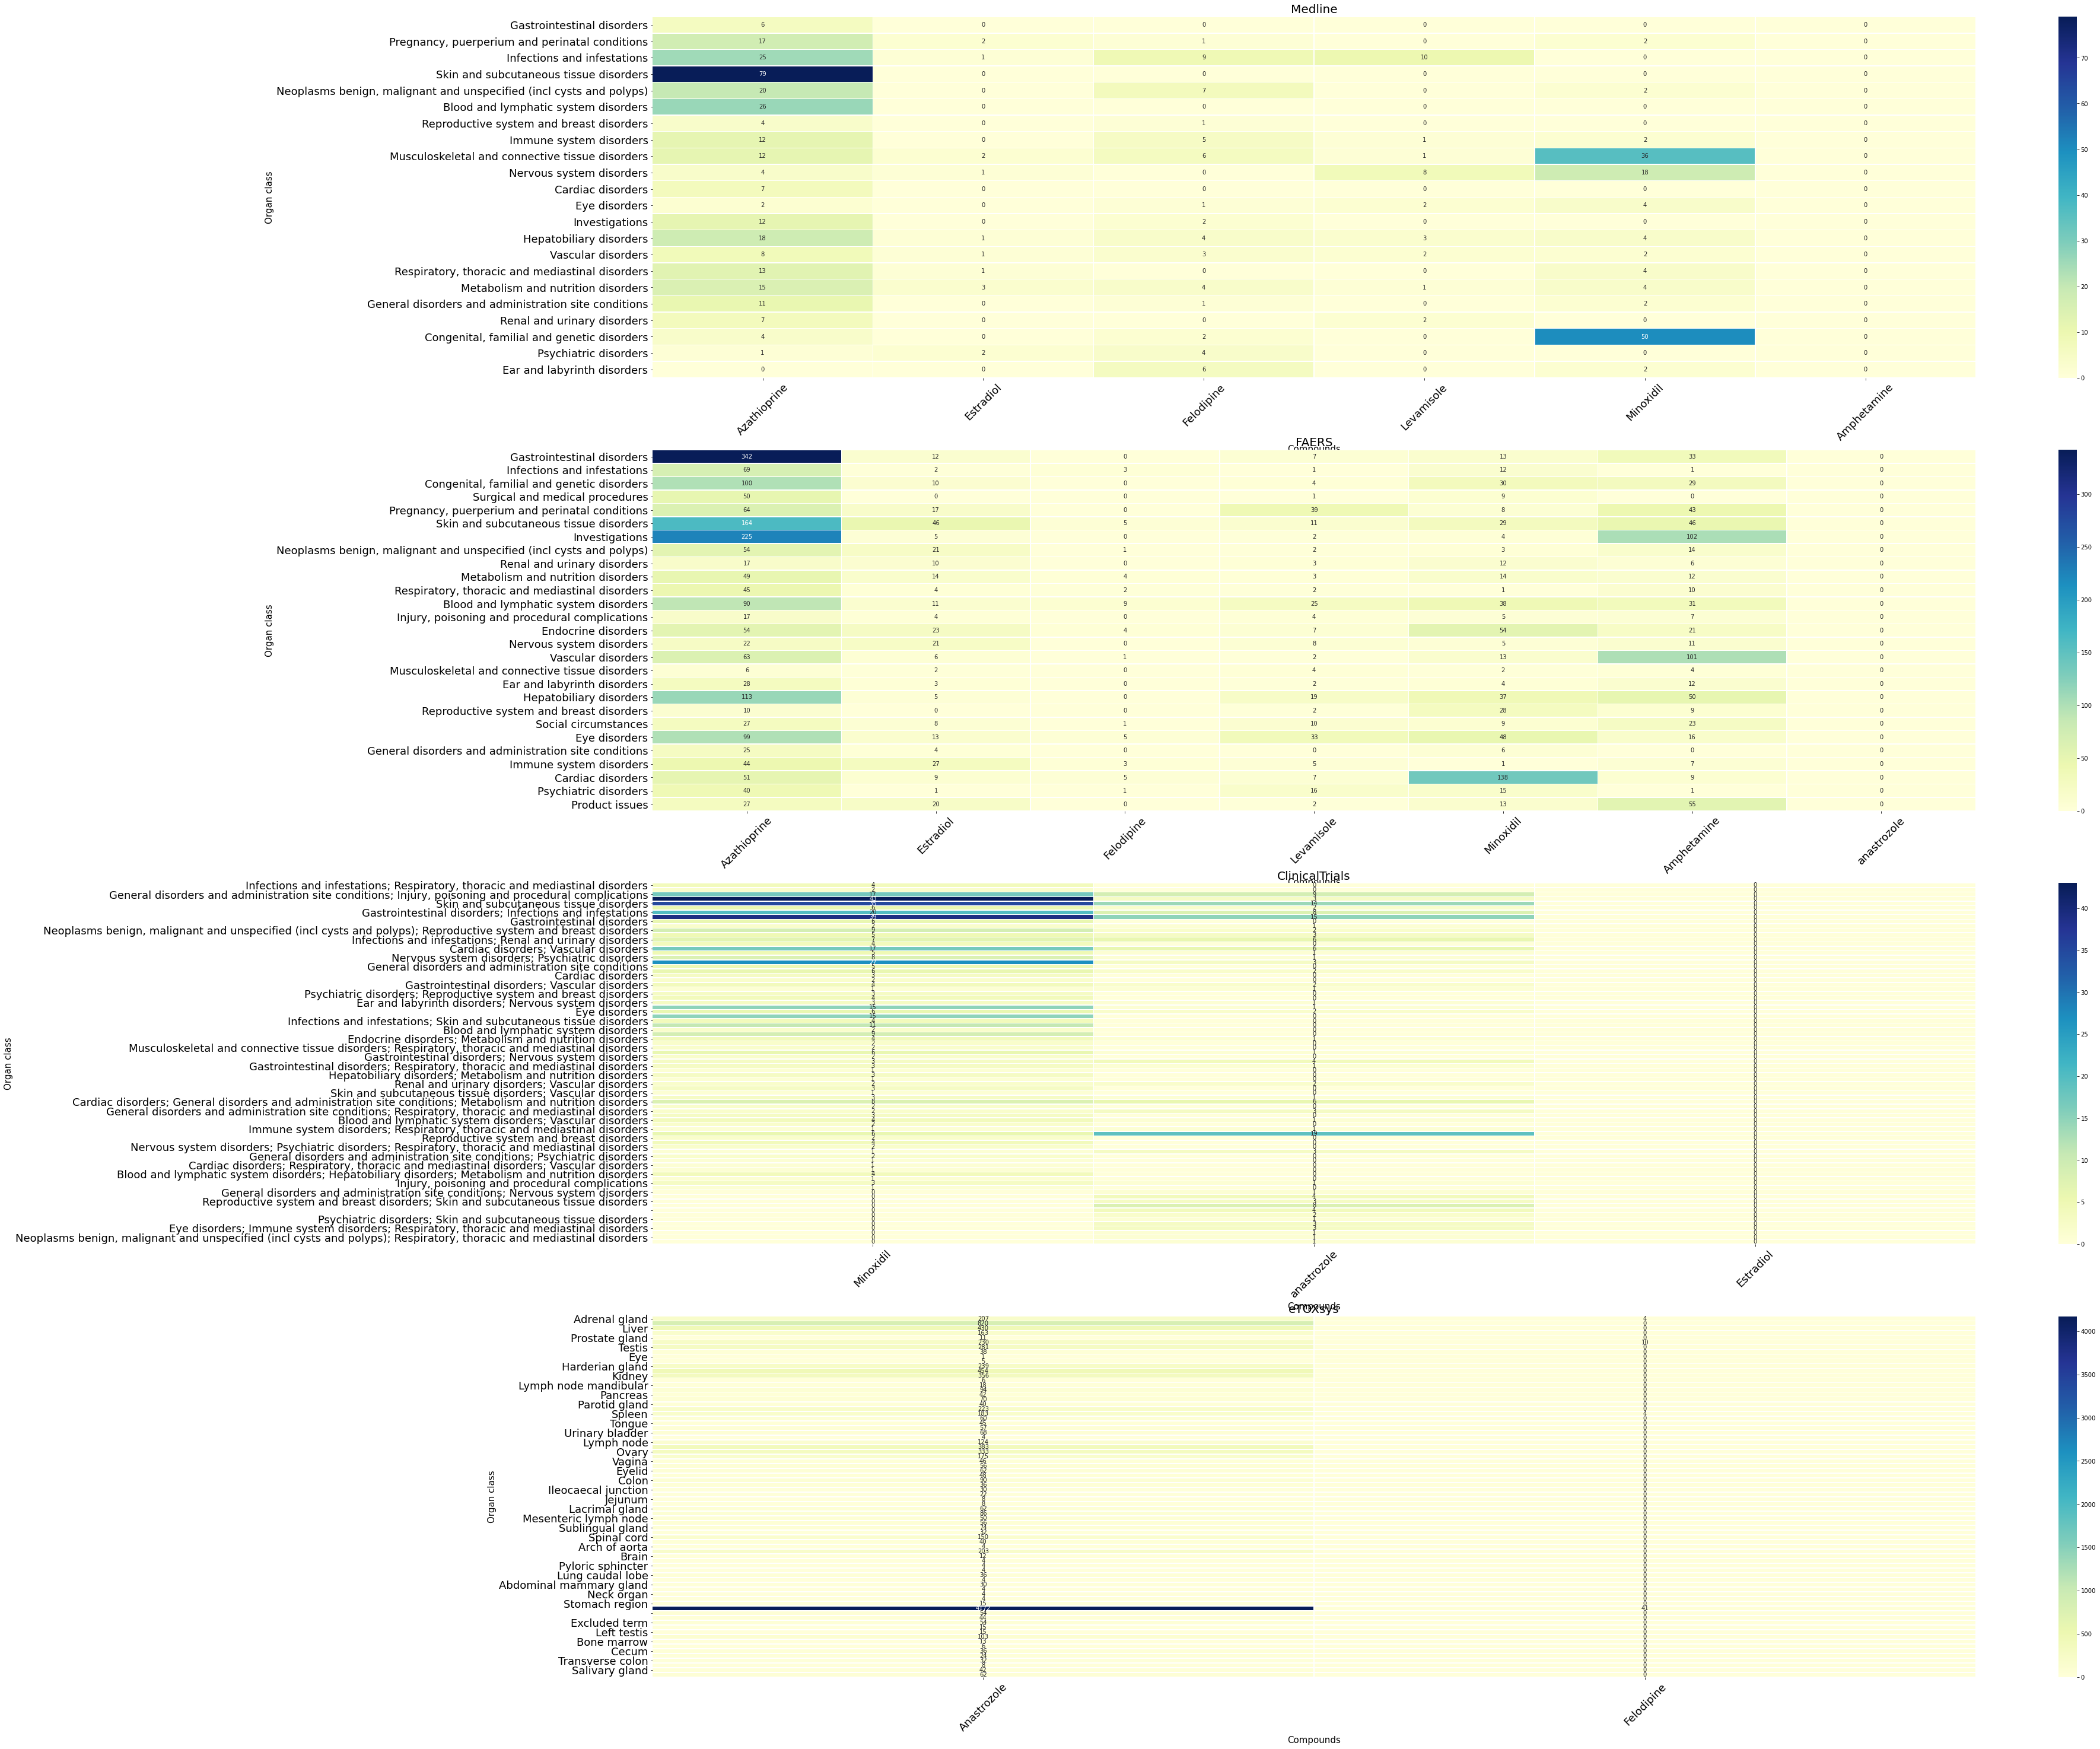

In [21]:
import numpy as np
import seaborn as sns
import pandas
import matplotlib.pyplot as plt

i = 1
figure, axes = plt.subplots(figsize=(40,40))
#figure, axes = plt.subplots(nrows=4, ncols=1)
figure.tight_layout(pad=3.0)
for source,value in system.items():
    #i = system.keys().index(source) + 1
    plt.subplot(4, 1, i)
    df = pandas.DataFrame(value['data'], index=value['rows'], columns=value['cols'])
    ax = sns.heatmap(df, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    ax.set_title(source, fontsize=20)
    plt.xlabel('Compounds', fontsize=15)
    plt.ylabel('Organ class', fontsize=15)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18, rotation=45)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=18)
    i += 1
plt.show()
